# Tesco Locations

Cillian Berragan  
2023-10-18

The following document demonstrates the ability to easily query the
cleaned UK dataset for Tesco shop locations.

## Analysis

1.  Import the required libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

1.  Read in the dataset using `geopandas` and print the first 5 rows
    -   Mask using the extent of the UK to remove outside points
    -   Filter to only show rows that are brands
    -   Only show some interesting columns

> ***NOTE:** The Local Authority Boundaries for the United Kingdom is
> available
> [here](https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2023-boundaries-uk-buc/explore).*

In [2]:
mask = gpd.GeoSeries(gpd.read_file("~/data/LAD_BUC_2022.gpkg").unary_union, crs=27700)
columns = ["names_value", "category_main", "brand_name_value", "geometry"]

df = gpd.read_parquet("./data/processed/uk_places_admin.parquet", columns=columns)
df = df.to_crs(27700).clip(mask=mask)
print(df.head())

                   names_value                     category_main  \
75631             Nudist Beach                             beach   
71650               Fife House  landmark_and_historical_building   
69417         Robert T Haddock                              None   
74157  Brighton Naturist Beach                             beach   
77856     Pavilion Scaffolding                              None   

      brand_name_value                       geometry  
75631             None  POINT (532811.740 103456.024)  
71650             None  POINT (532928.103 103588.747)  
69417             None  POINT (532898.035 103613.956)  
74157             None  POINT (532896.182 103625.790)  
77856             None  POINT (532913.658 103642.168)  

1.  Show number of Tesco locations

In [3]:
tesco = df.loc[df["brand_name_value"] == "Tesco"]
len(tesco)

2717

1.  Plot Tesco points

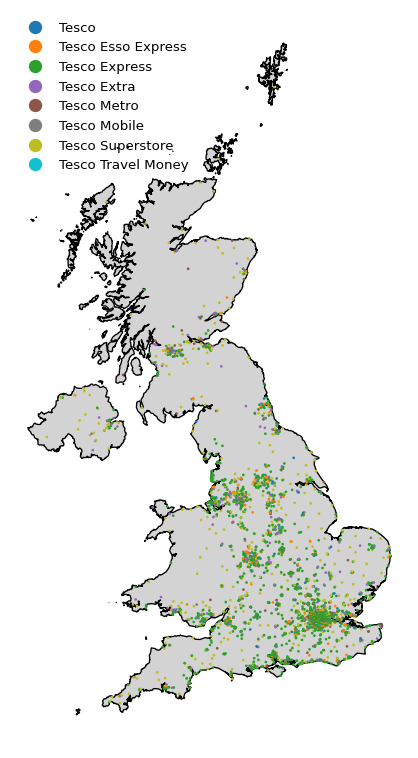

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

gpd.GeoSeries(mask).plot(facecolor="lightgrey", edgecolor="black", ax=ax)
tesco.plot(
    "names_value",
    ax=ax,
    legend=True,
    legend_kwds={"frameon": False},
    markersize=1,
)

ax.axis("off")
plt.show()